### Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='viridis')
%matplotlib inline

### Load the data

In [2]:
df = pd.read_csv('anime.csv')
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


* episode column has numerical values but still the data type is object

In [4]:
df['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

* In episode column there are some 'Unknown' entries, so we will replace those entries by 'None'

In [5]:
df['episodes'].replace('Unknown',None, inplace=True)
df['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       None, '39', '101', '47', '50', '62', '33', '112', '23', '3', '94',
       '6', '8', '14', '7', '40', '15', '203', '77', '291', '120', '102',
       '96', '38', '79', '175', '103', '70', '153', '45', '5', '21', '63',
       '52', '28', '145', '36', '69', '60', '178', '114', '35', '61',
       '34', '109', '20', '9', '49', '366', '97', '48', '78', '358',
       '155', '104', '113', '54', '167', '161', '42', '142', '31', '373',
       '220', '46', '195', '17', '1787', '73', '147', '127', '16', '19',
       '98', '150', '76', '53', '124', '29', '115', '224', '44', '58',
       '93', '154', '92', '67', '172', '86', '30', '276', '59', '72',
       '330', '41', '105', '128', '137', '56', '55', '65', '243', '193',
       '18', '191', '180', '91', '192', '66', '182', '32', '164', '100',
       '296', '694', '95', '68', '117', '151', '130', '87'

In [6]:
df['episodes']=pd.to_numeric(df['episodes'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  11954 non-null  float64
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 672.5+ KB


In [7]:
df.describe()

,anime_id,episodes,rating,members
count,12294.000000,11954.000000,12064.000000,1.229400e+04
mean,14058.221653,12.382550,6.473902,1.807134e+04
std,11455.294701,46.865352,1.026746,5.482068e+04
min,1.000000,1.000000,1.670000,5.000000e+00
25%,3484.250000,1.000000,5.880000,2.250000e+02
50%,10260.500000,2.000000,6.570000,1.550000e+03
75%,24794.500000,12.000000,7.180000,9.437000e+03
max,34527.000000,1818.000000,10.000000,1.013917e+06


* There are 12294 records and rating column has 12064 entries, i.e. 230 missing entries are in the rating column
* Also in episode column 340 missing entries
* mean of anime_id column is 14058 and median is 10260, i.e. anime_id column is positively skewed
* difference between 75th percentile and max is huge in episodes column, which implies there are possible outliers at higher side
* rating column seems symmetric
* for members column also mean is greater than median, so members column is also positively skewed

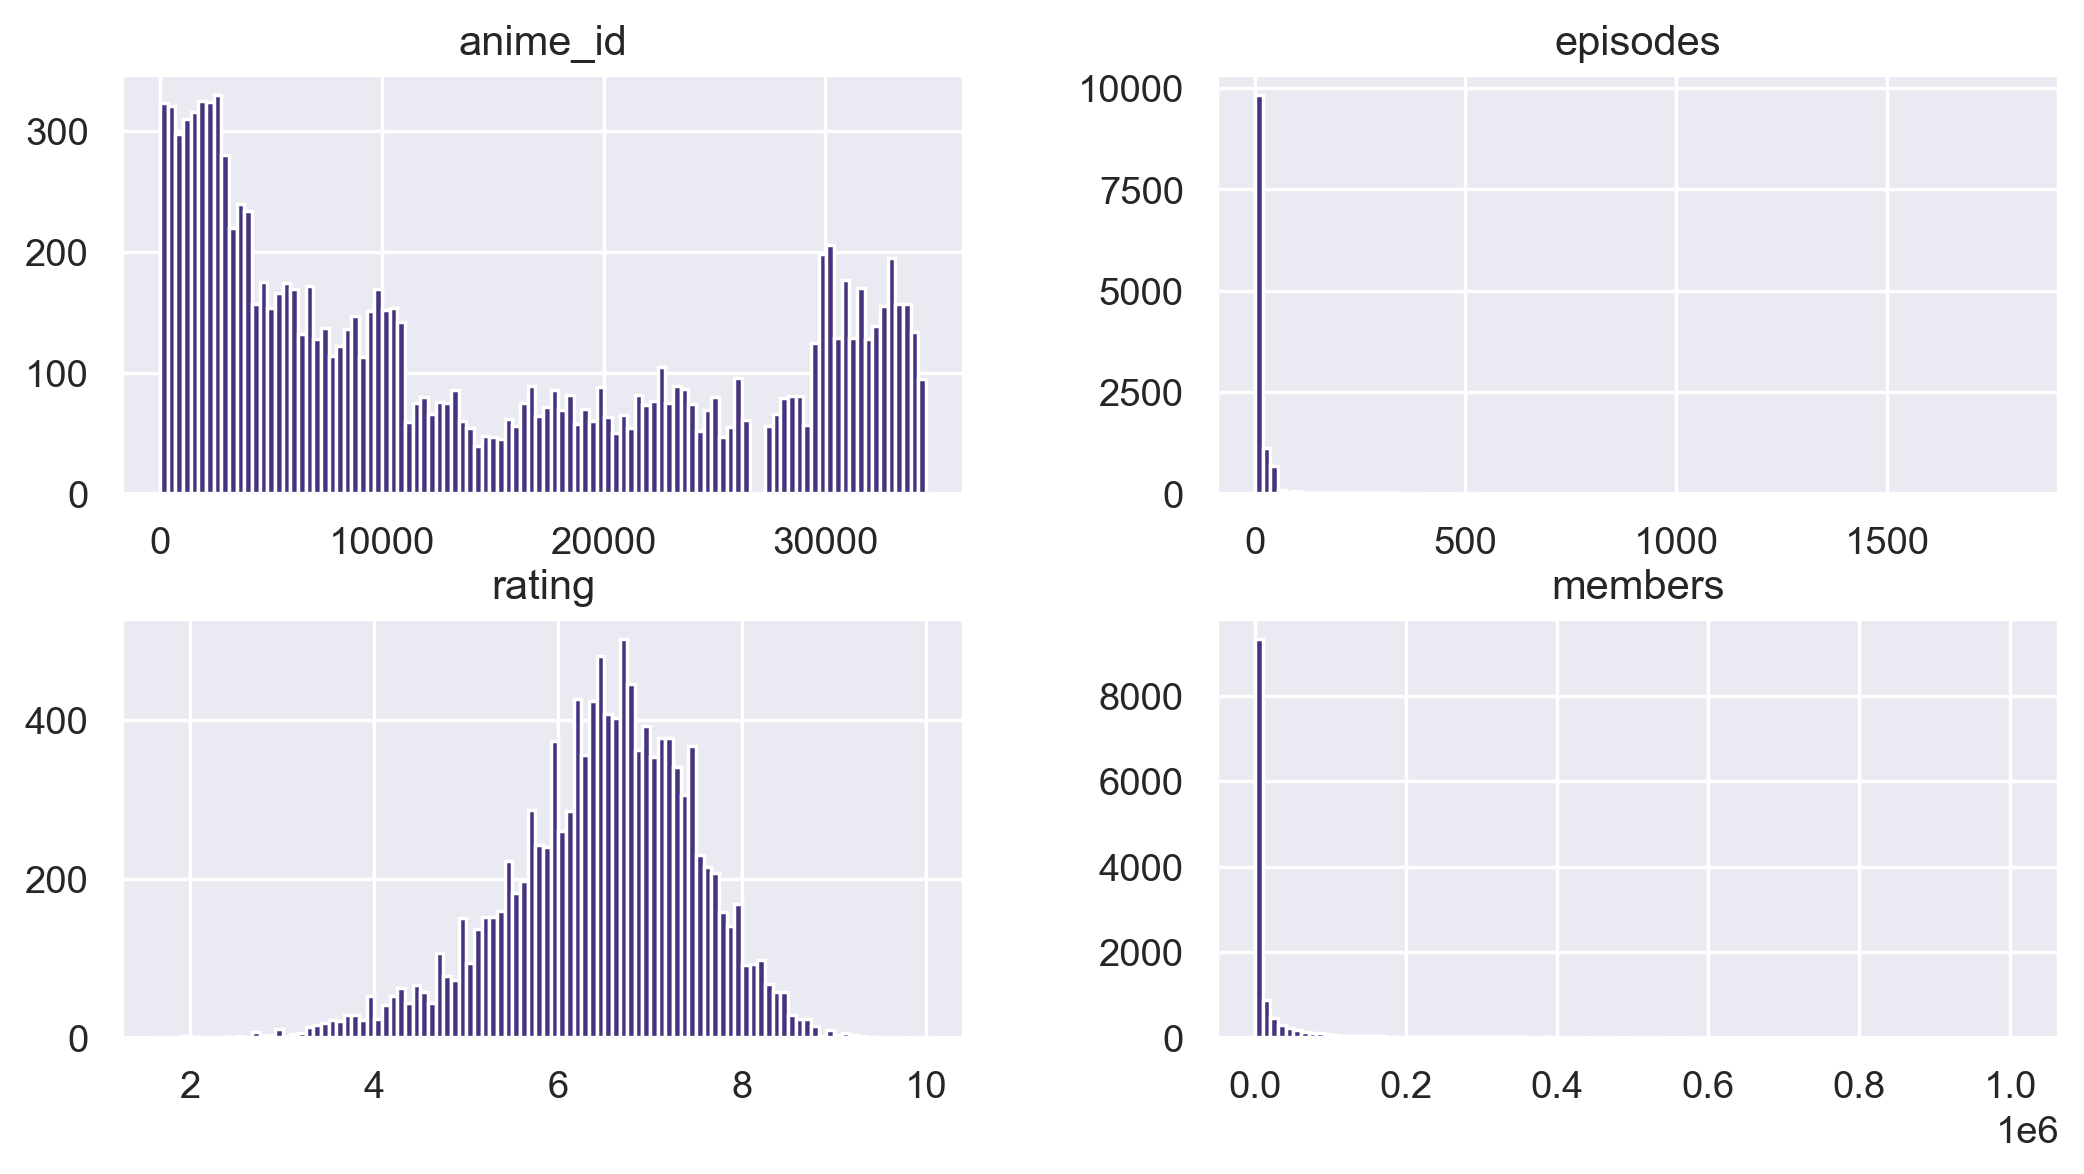

In [8]:
df.hist(bins=100)
plt.show()

<Axes: >

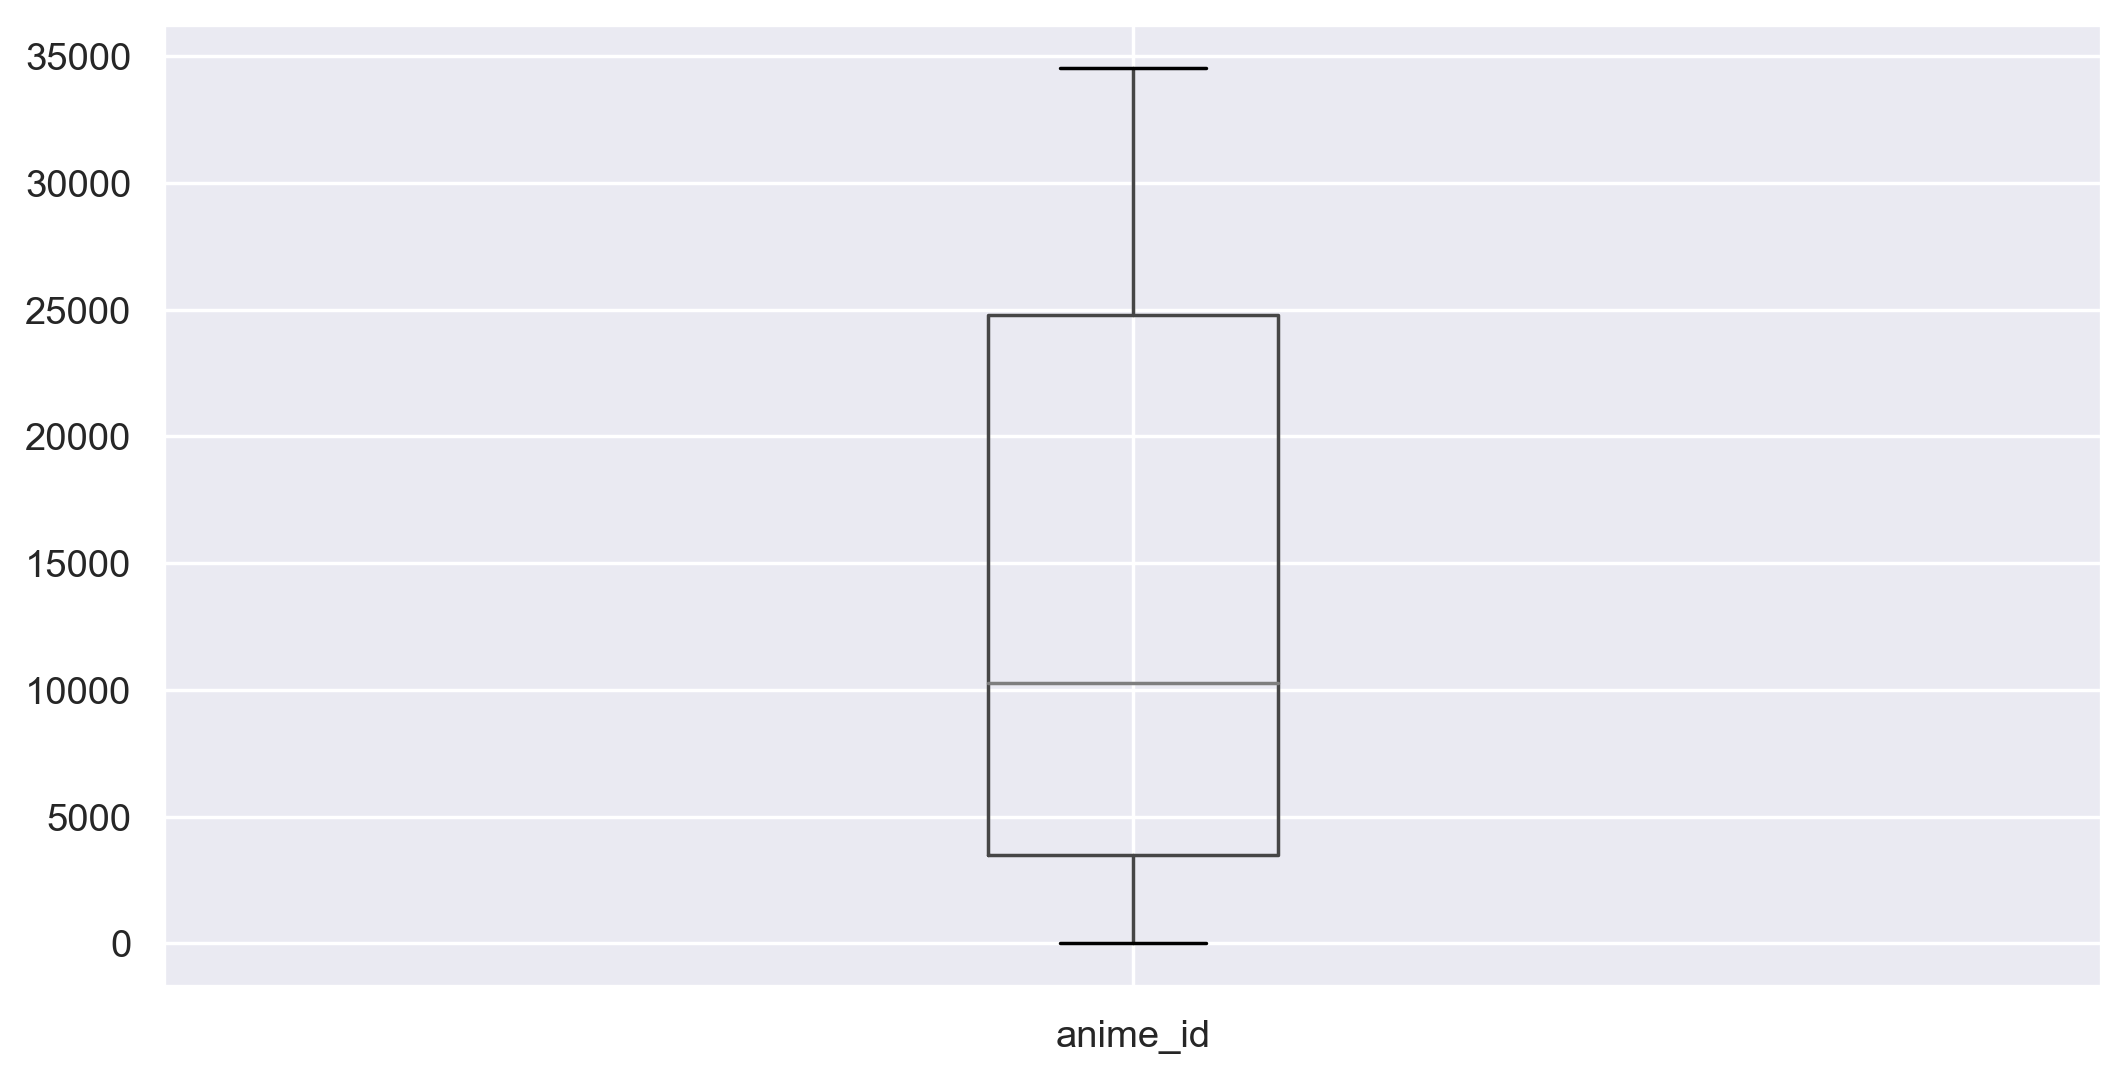

In [9]:
df.boxplot(['anime_id'])

* there are no outliers in anime_id

<Axes: >

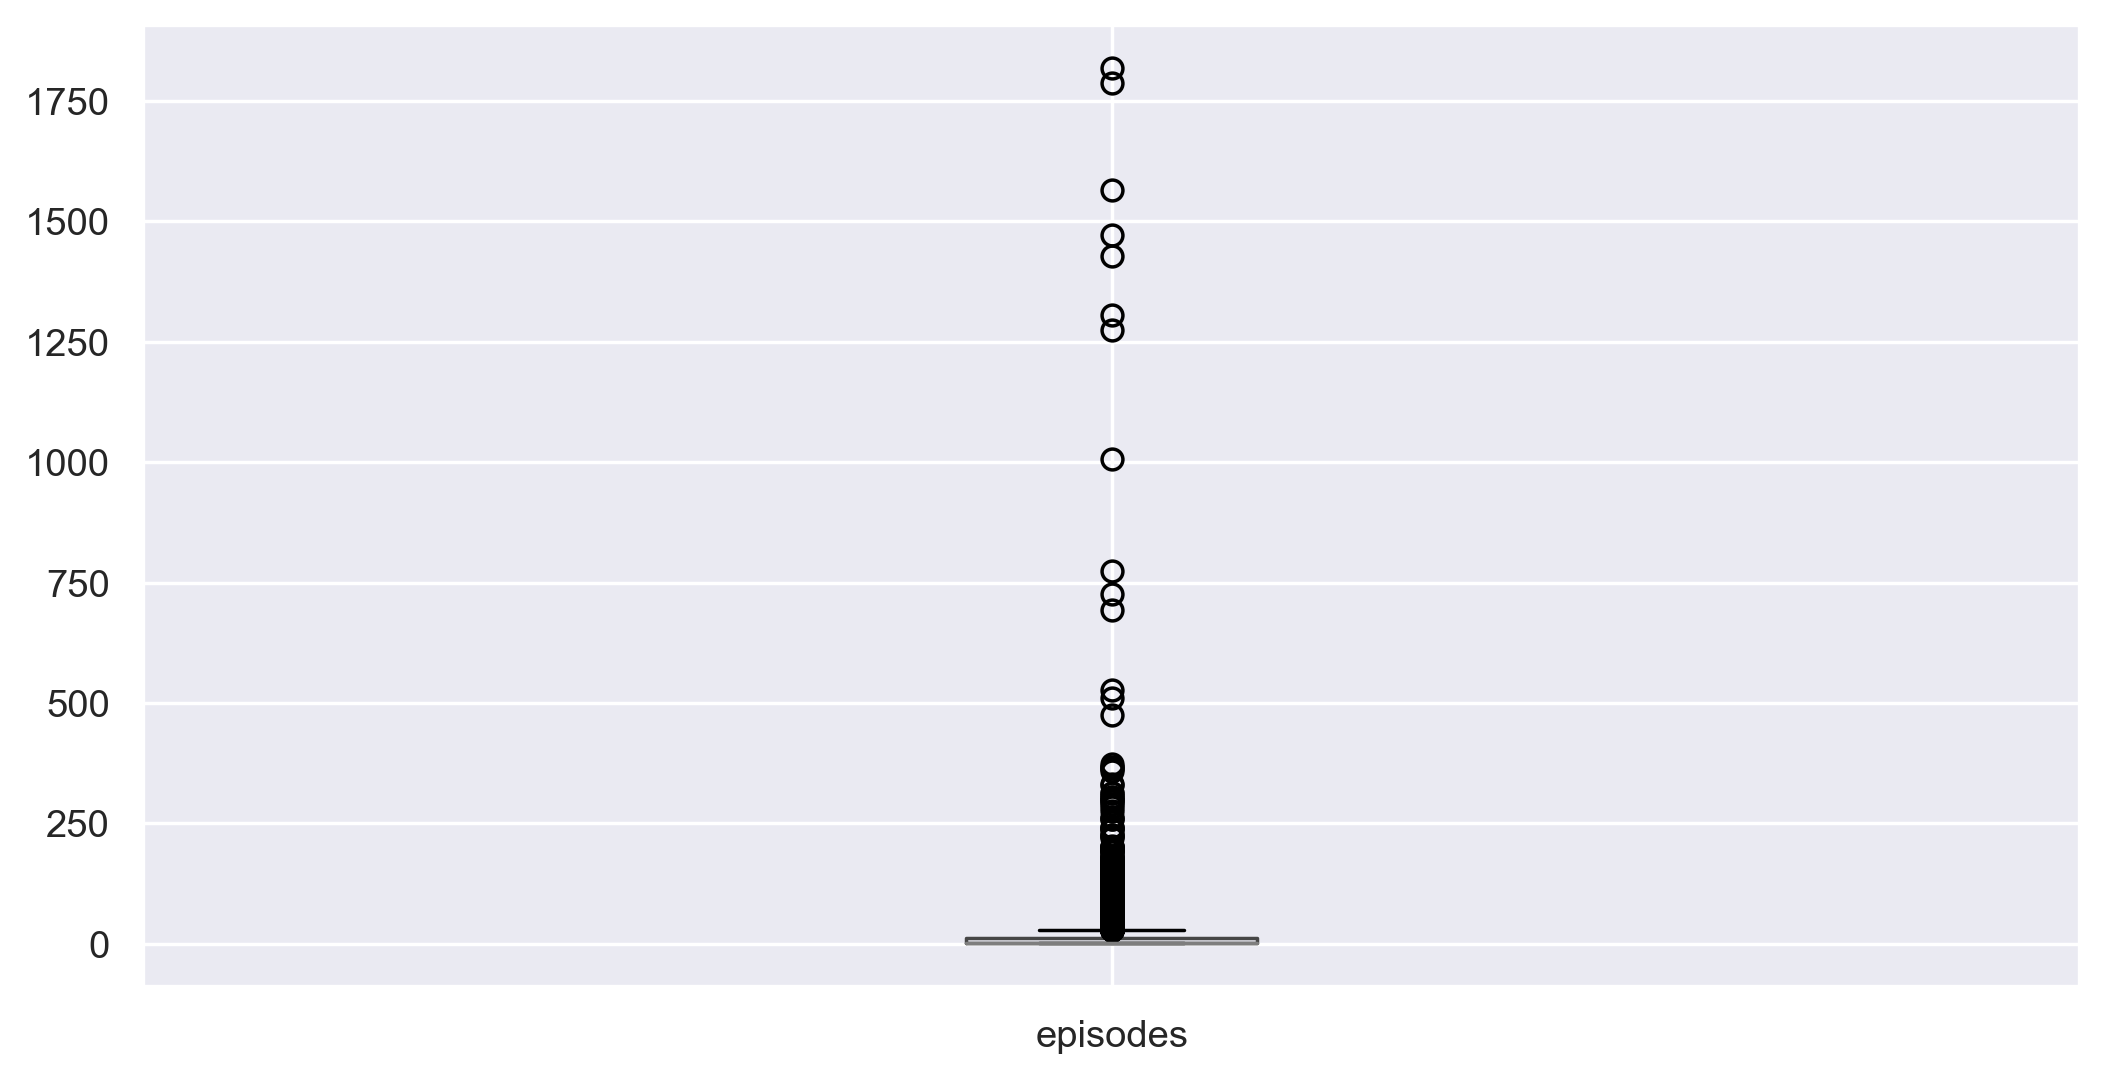

In [10]:
df.boxplot(['episodes'])

* there are outliers at higher side in episodes column

<Axes: >

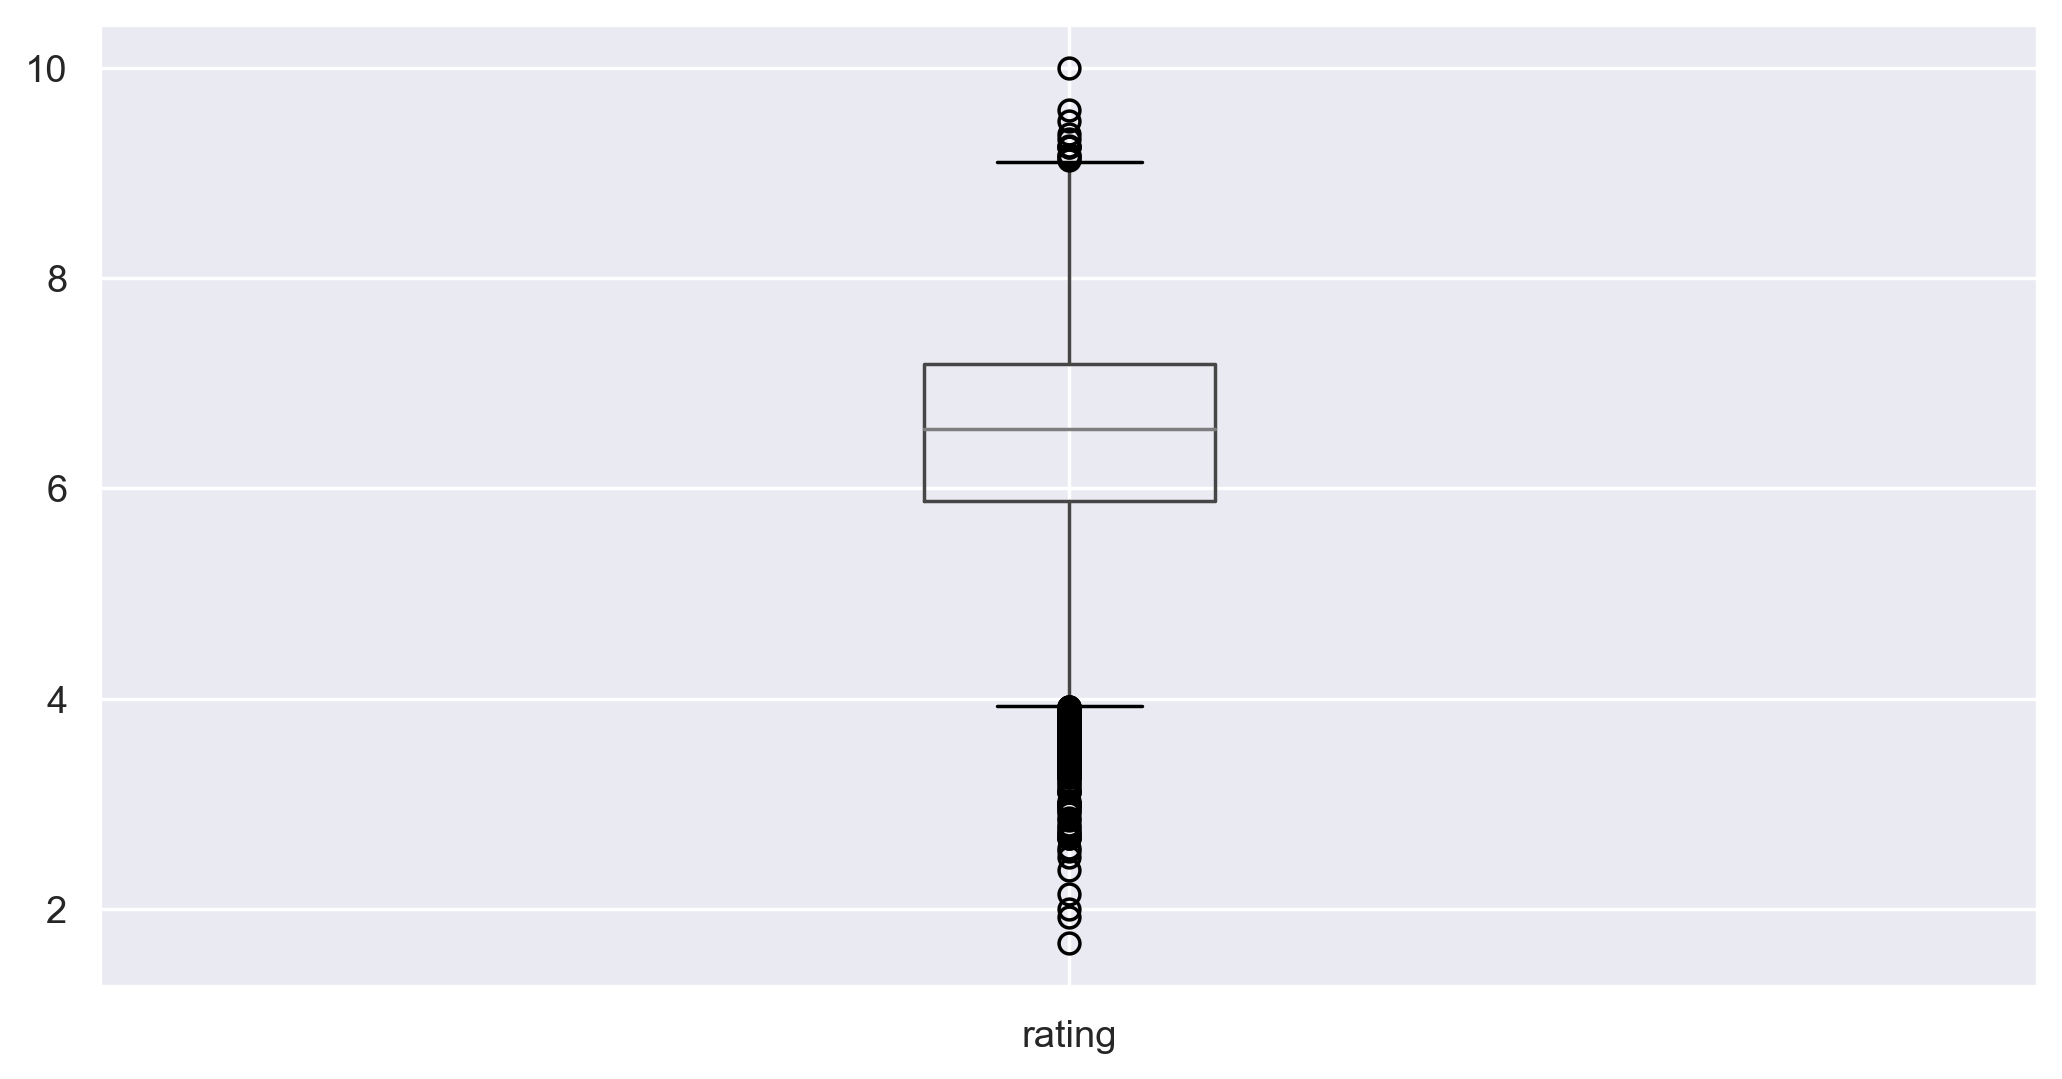

In [11]:
df.boxplot(['rating'])

* rating column has outliers at lower as well as higher side

<Axes: >

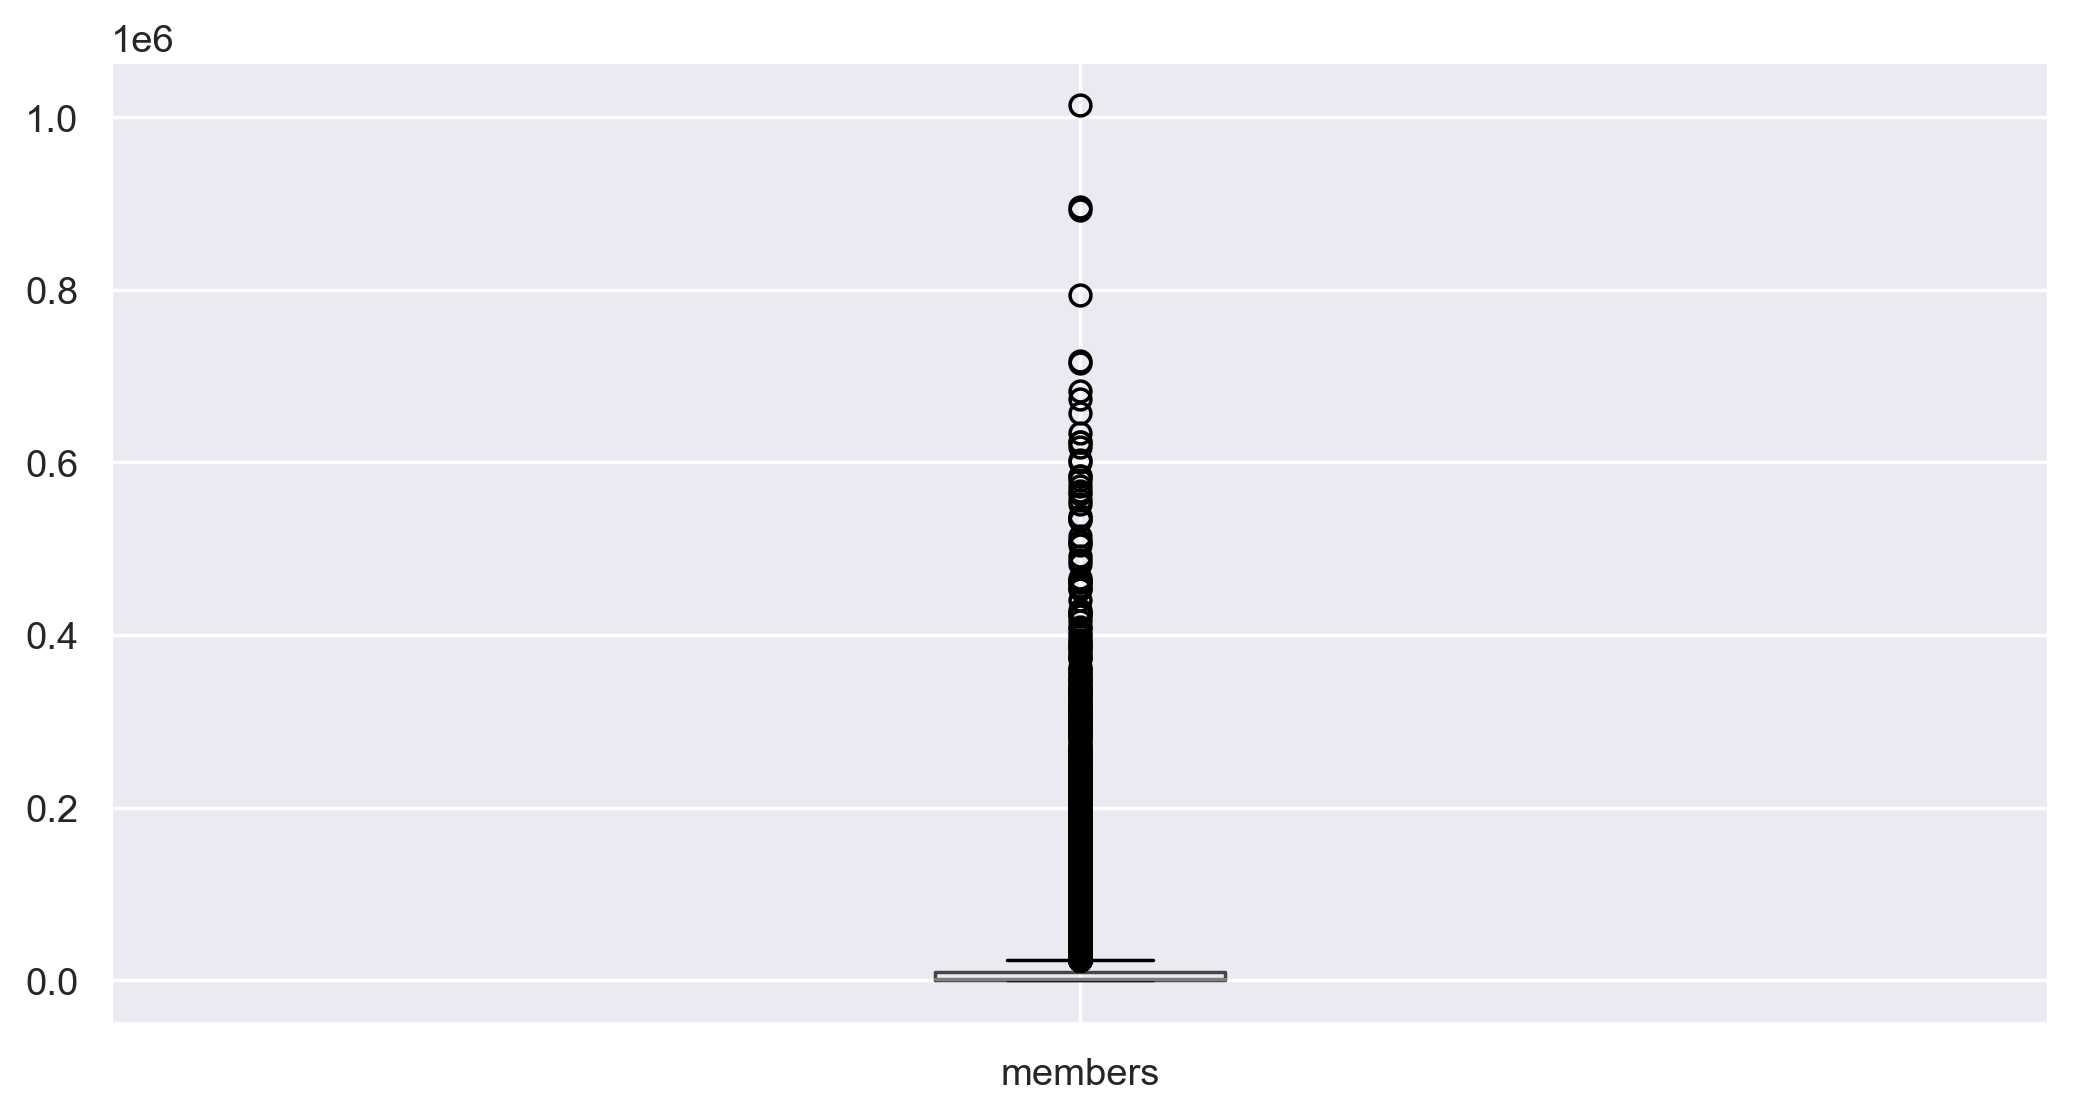

In [12]:
df.boxplot(['members'])

* member column has outliers at higher side

In [13]:
df.describe(include='object')

,name,genre,type
count,12294,12232,12269
unique,12292,3264,6
top,Shi Wan Ge Leng Xiaohua,Hentai,TV
freq,2,823,3787


In [14]:
df['type'].value_counts()

type
TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: count, dtype: int64

In [15]:
df[df['name']=='Shi Wan Ge Leng Xiaohua']

,anime_id,name,genre,type,episodes,rating,members
10193,33193,Shi Wan Ge Leng Xiaohua,"Comedy, Parody",ONA,12.0,6.67,114
10194,33195,Shi Wan Ge Leng Xiaohua,"Action, Adventure, Comedy, Fantasy, Parody",Movie,1.0,7.07,110


## Data Visualization

### Countplot

<Axes: xlabel='count', ylabel='type'>

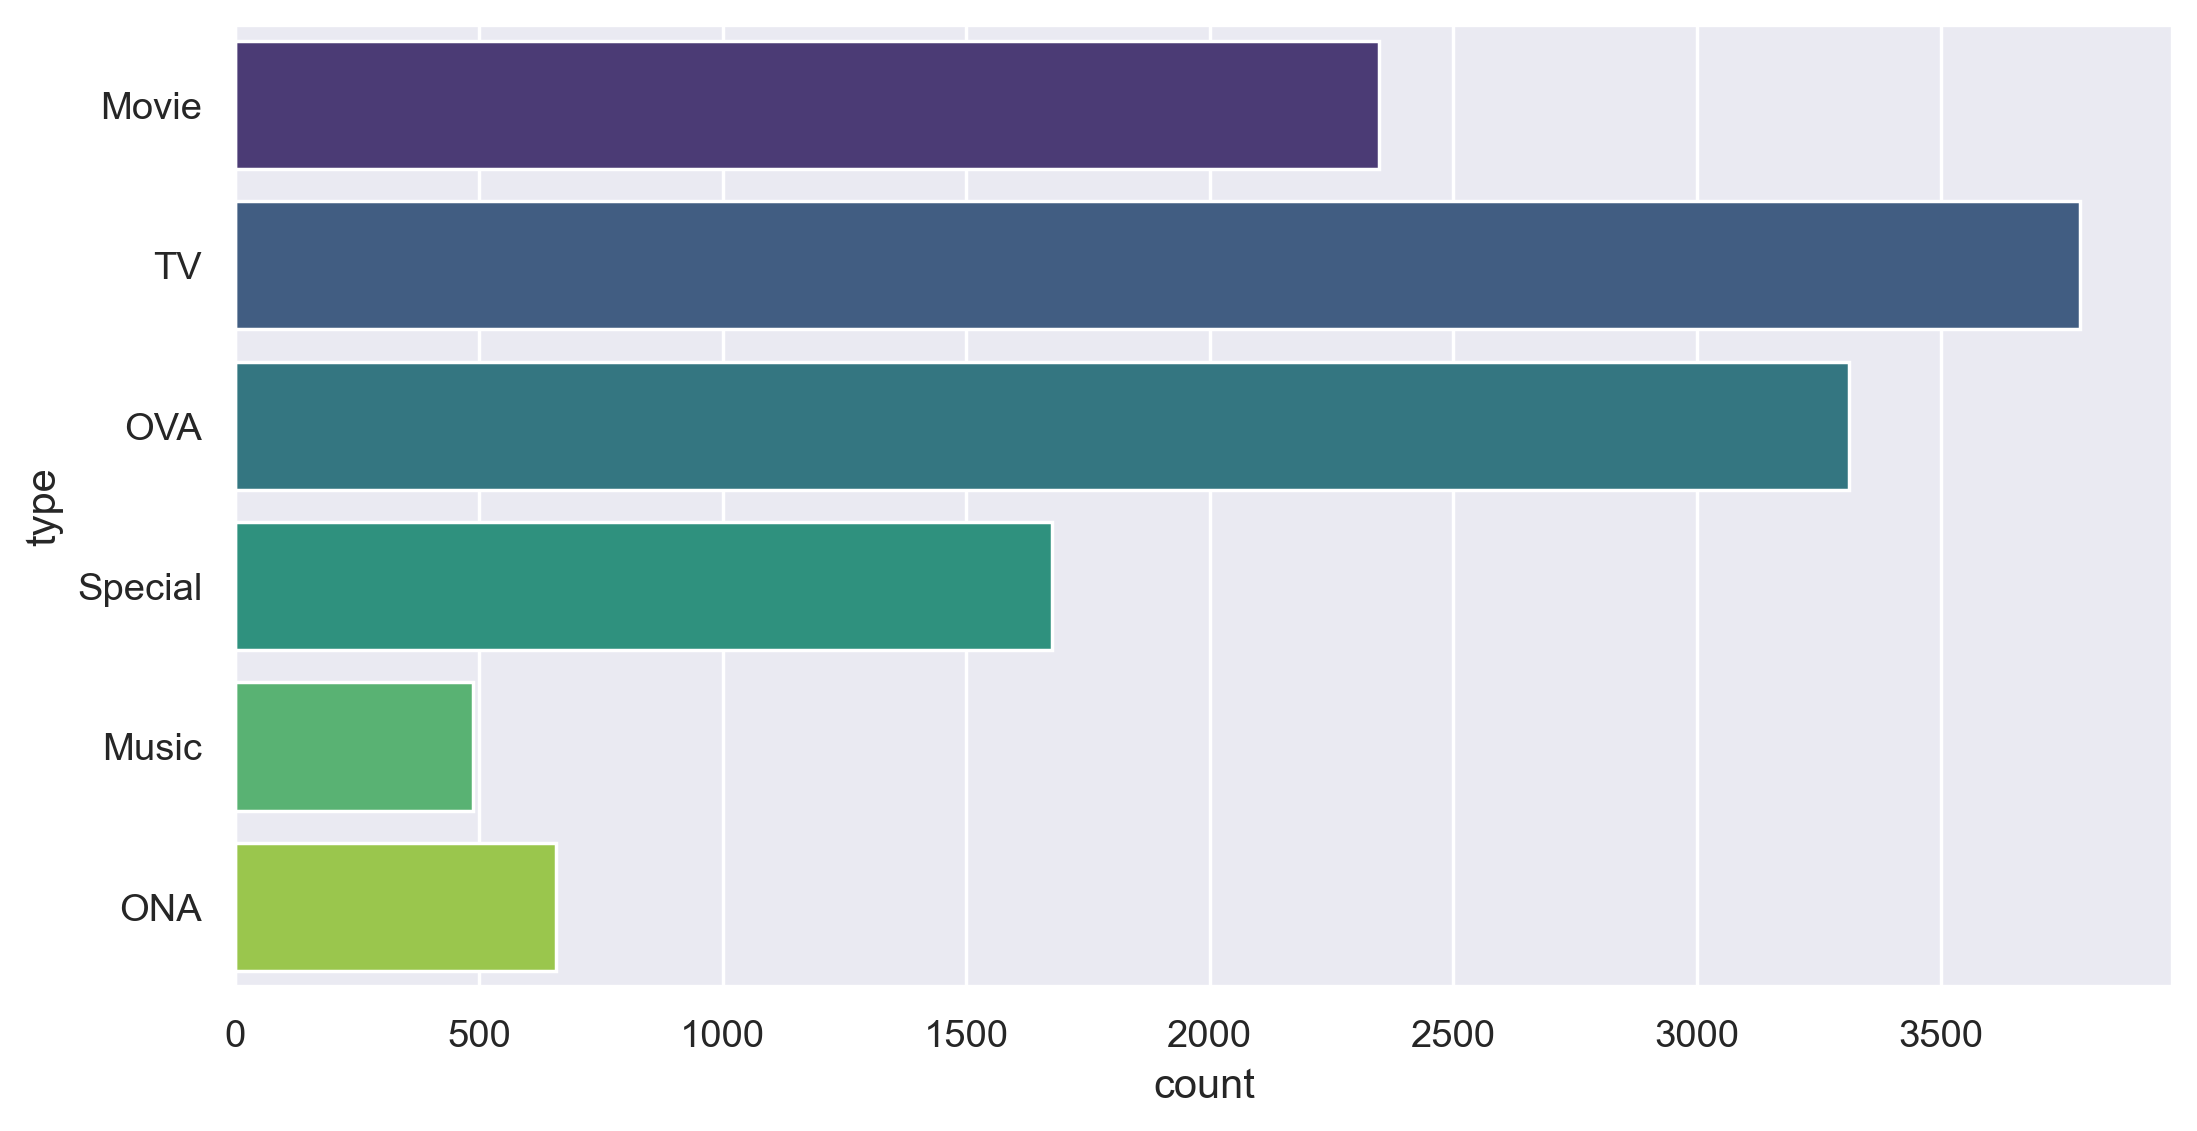

In [16]:
sns.countplot(y = df['type'])

# Data Preprocessing:

## Outliers

We will use Capping method to treat outliers

In [17]:
# Outliers are present in the following columns
outliers_columns = ['episodes','members']

# outlier_detection
def outlier_detection(data, col_name):
    Q1 = data[col_name].quantile(0.25)
    Q3 = data[col_name].quantile(0.75)
    IQR = Q3-Q1
    LE = Q1 - 1.5*IQR
    UE = Q3 + 1.5*IQR
    #return data.index[(data[col_name] < LE) | (data[col_name] > UE)].tolist()
    return LE,UE

# Dictionary for lower and upper extreme
LU_Extremes = {}
for col in outliers_columns:
    LU_Extremes[col] = outlier_detection(df, col)
LU_Extremes

# Outliers Capping
for col in LU_Extremes:
    df.loc[df[col] < LU_Extremes[col][0] , col]=LU_Extremes[col][0]
    df.loc[df[col] > LU_Extremes[col][1] , col]=LU_Extremes[col][1]

<Axes: >

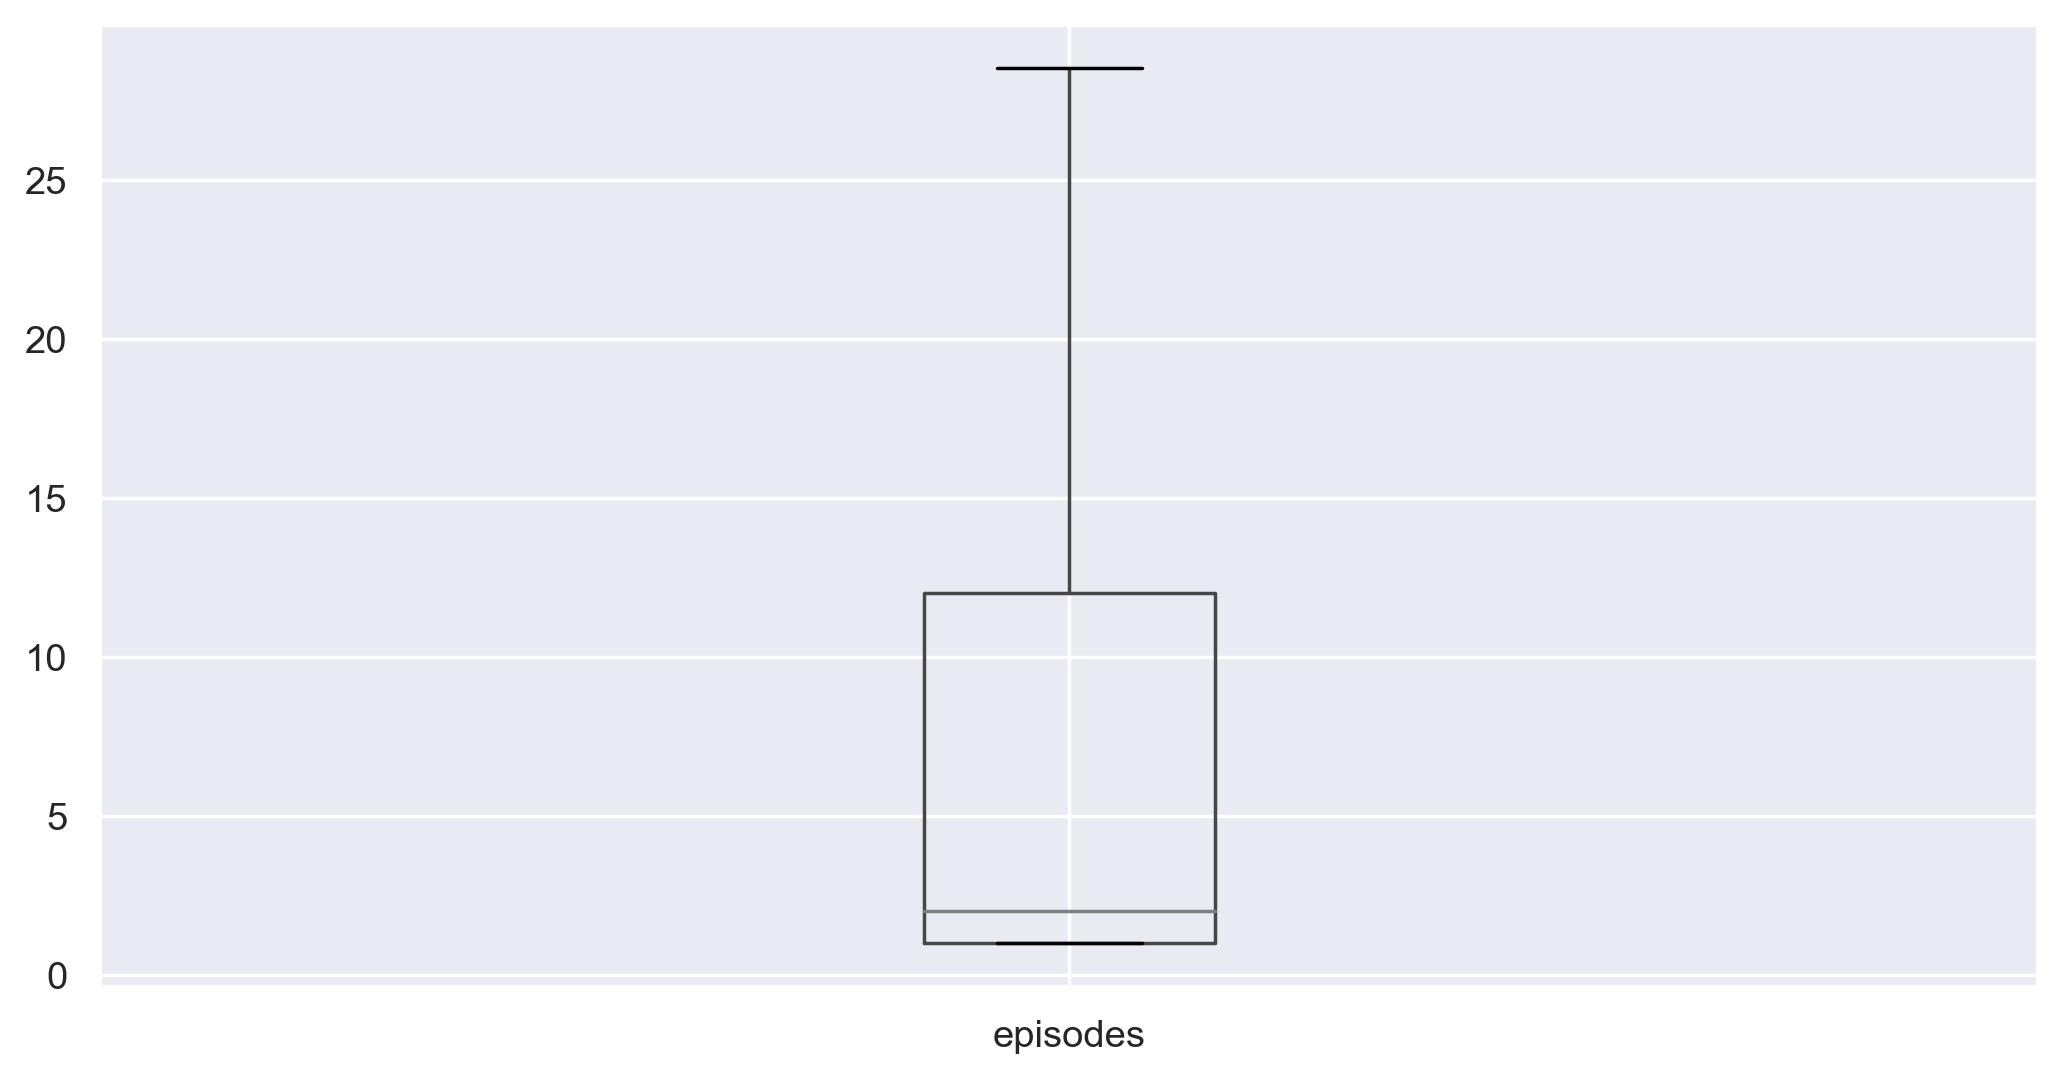

In [18]:
df.boxplot(['episodes'])

<Axes: >

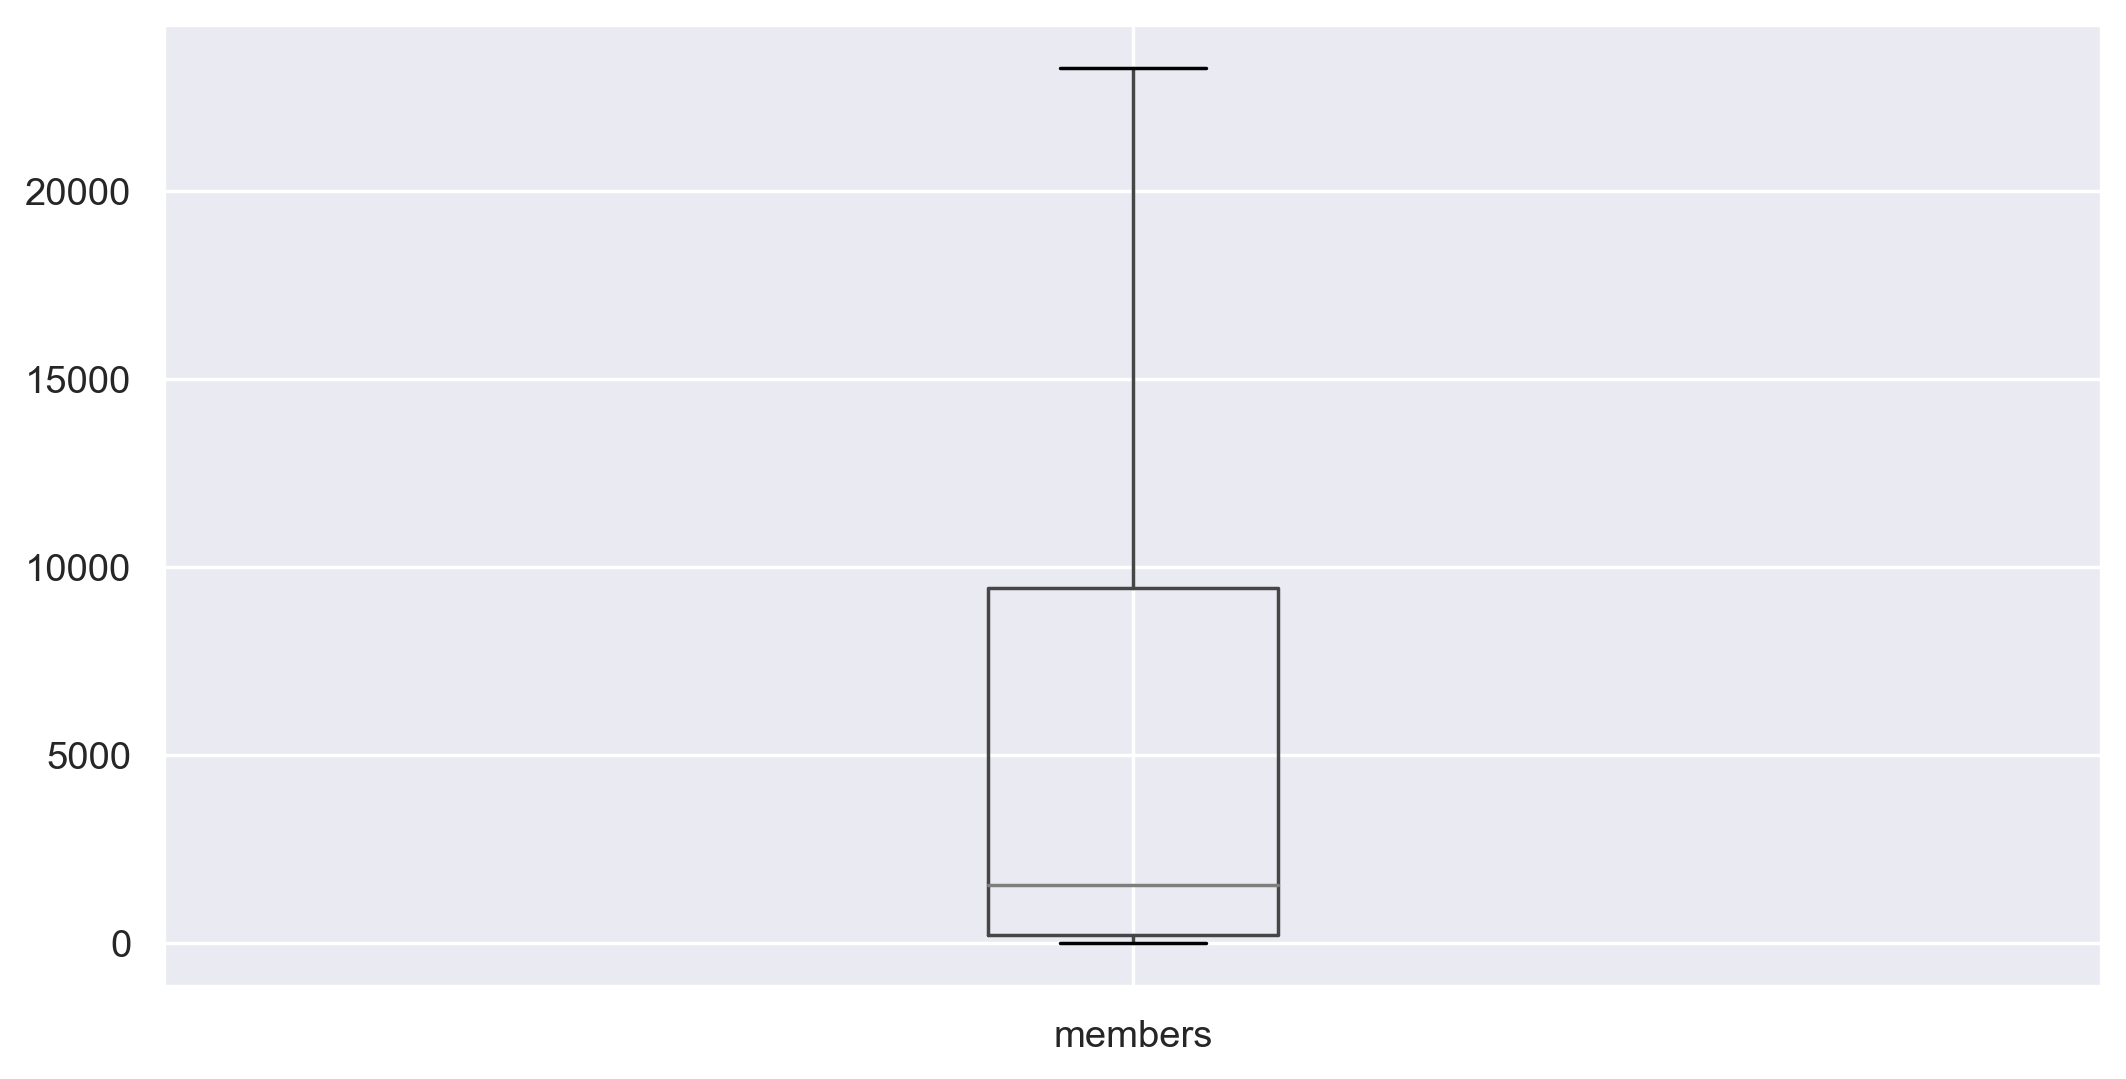

In [19]:
df.boxplot(['members'])

## Missing Value

In [20]:
df.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes    340
rating      230
members       0
dtype: int64

In [21]:
df.groupby(["type"])["episodes"].value_counts()

type   episodes
Movie  1.0         2311
       2.0            8
       3.0            7
       12.0           4
       6.0            3
                   ... 
TV     18.0           6
       19.0           4
       7.0            3
       17.0           3
       2.0            1
Name: count, Length: 118, dtype: int64

In [22]:
df[df['type'].isna()]

,anime_id,name,genre,type,episodes,rating,members
10898,30484,Steins;Gate 0,"Sci-Fi, Thriller",NaN,NaN,NaN,23255
10900,34437,Code Geass: Fukkatsu no Lelouch,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",NaN,NaN,NaN,22748
10906,33352,Violet Evergarden,"Drama, Fantasy",NaN,NaN,NaN,20564
10907,33248,K: Seven Stories,"Action, Drama, Super Power, Supernatural",NaN,NaN,NaN,22133
10918,33845,Free! (Shinsaku),"School, Sports",NaN,NaN,NaN,8666
10949,33475,Busou Shoujo Machiavellianism,"Action, School, Shounen",NaN,NaN,NaN,1896
10963,31456,Code:Realize: Sousei no Himegimi,"Adventure, Fantasy, Romance, Shoujo",NaN,NaN,NaN,4017
10983,34332,Flying Babies,NaN,NaN,NaN,NaN,22
10988,34280,Gamers!,"Comedy, Romance, School",NaN,NaN,NaN,1045
10990,34485,Ganko-chan,NaN,NaN,NaN,NaN,11


* For all the records where type is missing, episodes and ratings are also missing.
* Hence we will delete these records as these records are not going to help us in building the model

In [23]:
df.dropna(subset=['type'], inplace=True)
df.isna().sum()

anime_id      0
name          0
genre        59
type          0
episodes    315
rating      205
members       0
dtype: int64

In [24]:
show_types = list((df['type'].value_counts()).keys())

for key in show_types:
    df.loc[(df['type']==key) & (df['episodes'].isna()), 'episodes']=df[df['type']==key]['episodes'].mode()[0]

df.isna().sum()

anime_id      0
name          0
genre        59
type          0
episodes      0
rating      205
members       0
dtype: int64

* Null values in genre we will replace by Unknown, as it is not feasible to predict genre from other data

In [25]:
df['genre'].fillna('Unknown', inplace=True)
df.isna().sum()

anime_id      0
name          0
genre         0
type          0
episodes      0
rating      205
members       0
dtype: int64

* Null entries in rating column we will replace by 0

In [26]:
df['rating'].fillna(0, inplace=True)
df.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

# Feature Extraction:

Decide on the features that will be used for computing similarity (e.g., genres, user ratings).
Convert categorical features into numerical representations if necessary.
Normalize numerical features if required.

In [27]:
anime = df.copy()

In [28]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
tf.fit(anime['genre']) 
tf.get_feature_names_out()

array(['action', 'adventure', 'ai', 'arts', 'cars', 'comedy', 'dementia',
       'demons', 'drama', 'ecchi', 'fantasy', 'fi', 'game', 'harem',
       'hentai', 'historical', 'horror', 'josei', 'kids', 'life', 'magic',
       'martial', 'mecha', 'military', 'music', 'mystery', 'of', 'parody',
       'police', 'power', 'psychological', 'romance', 'samurai', 'school',
       'sci', 'seinen', 'shoujo', 'shounen', 'slice', 'space', 'sports',
       'super', 'supernatural', 'thriller', 'unknown', 'vampire', 'yaoi',
       'yuri'], dtype=object)

In [29]:
tfidf_matrix = tf.fit_transform(anime['genre'])
tfidf_matrix.shape 

(12269, 48)

In [30]:
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.29468938, 0.31740788, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.25065753, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [31]:
new_df1 = pd.DataFrame(tfidf_matrix.todense(), 
    columns=tf.get_feature_names_out(),
    index=anime.name)
new_df1

,action,adventure,ai,arts,cars,comedy,dementia,demons,drama,ecchi,...,slice,space,sports,super,supernatural,thriller,unknown,vampire,yaoi,yuri
name,,,,,,,,,,,,,,,,,,,,,
Kimi no Na wa.,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.440424,0.0,...,0.0,0.0,0.0,0.0,0.544188,0.000000,0.0,0.0,0.0,0.0
Fullmetal Alchemist: Brotherhood,0.294689,0.317408,0.0,0.0,0.0,0.000000,0.0,0.0,0.335946,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
Gintama°,0.250658,0.000000,0.0,0.0,0.0,0.200604,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
Steins;Gate,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.834135,0.0,0.0,0.0,0.0
Gintama&#039;,0.250658,0.000000,0.0,0.0,0.0,0.200604,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Toushindai My Lover: Minami tai Mecha-Minami,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
Under World,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
Violence Gekiga David no Hoshi,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [32]:
new_df1["type"]=df["type"].values
new_df1

,action,adventure,ai,arts,cars,comedy,dementia,demons,drama,ecchi,...,space,sports,super,supernatural,thriller,unknown,vampire,yaoi,yuri,type
name,,,,,,,,,,,,,,,,,,,,,
Kimi no Na wa.,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.440424,0.0,...,0.0,0.0,0.0,0.544188,0.000000,0.0,0.0,0.0,0.0,Movie
Fullmetal Alchemist: Brotherhood,0.294689,0.317408,0.0,0.0,0.0,0.000000,0.0,0.0,0.335946,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,TV
Gintama°,0.250658,0.000000,0.0,0.0,0.0,0.200604,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,TV
Steins;Gate,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.834135,0.0,0.0,0.0,0.0,TV
Gintama&#039;,0.250658,0.000000,0.0,0.0,0.0,0.200604,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,TV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Toushindai My Lover: Minami tai Mecha-Minami,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,OVA
Under World,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,OVA
Violence Gekiga David no Hoshi,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,OVA


In [33]:
pivot = pd.DataFrame(pd.get_dummies(new_df1, columns = ['type'],dtype=int))
pivot.head()

,action,adventure,ai,arts,cars,comedy,dementia,demons,drama,ecchi,...,unknown,vampire,yaoi,yuri,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
name,,,,,,,,,,,,,,,,,,,,,
Kimi no Na wa.,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.440424,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
Fullmetal Alchemist: Brotherhood,0.294689,0.317408,0.0,0.0,0.0,0.000000,0.0,0.0,0.335946,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
Gintama°,0.250658,0.000000,0.0,0.0,0.0,0.200604,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
Steins;Gate,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
Gintama&#039;,0.250658,0.000000,0.0,0.0,0.0,0.200604,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1


# Recommendation System:

In [34]:
from sklearn.metrics import pairwise_distances
final_df = pairwise_distances(pivot,metric='cosine')
final_df

array([[1.11022302e-16, 9.26020695e-01, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 5.00000000e-01],
       [9.26020695e-01, 2.22044605e-16, 4.10685548e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.10685548e-01, 1.11022302e-16, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       ...,
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        2.22044605e-16, 2.22044605e-16, 5.00000000e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        2.22044605e-16, 2.22044605e-16, 5.00000000e-01],
       [5.00000000e-01, 1.00000000e+00, 1.00000000e+00, ...,
        5.00000000e-01, 5.00000000e-01, 2.22044605e-16]])

In [35]:
sim = 1 - final_df
sim

array([[1.        , 0.07397931, 0.        , ..., 0.        , 0.        ,
        0.5       ],
       [0.07397931, 1.        , 0.58931445, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.58931445, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.5       ],
       [0.5       , 0.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ]])

In [36]:
np.fill_diagonal(sim,0)
sim

array([[0.        , 0.07397931, 0.        , ..., 0.        , 0.        ,
        0.5       ],
       [0.07397931, 0.        , 0.58931445, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.58931445, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.5       ],
       [0.5       , 0.        , 0.        , ..., 0.5       , 0.5       ,
        0.        ]])

In [37]:
similarity = pd.DataFrame(sim)
similarity

,0,1,2,3,4,5,6,7,8,9,...,12259,12260,12261,12262,12263,12264,12265,12266,12267,12268
0,0.000000,0.073979,0.000000,0.000000,0.000000,0.212632,0.000000,0.078309,0.500000,0.000000,...,0.0,0.139567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
1,0.073979,0.000000,0.589314,0.500000,0.589314,0.641973,0.670185,0.203821,0.089314,0.589314,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.589314,0.000000,0.610355,1.000000,0.591475,0.597826,0.099635,0.500000,1.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.500000,0.610355,0.000000,0.610355,0.500000,0.500000,0.137333,0.110355,0.610355,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.589314,1.000000,0.610355,0.000000,0.591475,0.597826,0.099635,0.500000,1.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12264,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,...,1.0,0.749342,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.5
12265,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,...,1.0,0.749342,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.5
12266,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,...,1.0,0.749342,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.5
12267,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,...,1.0,0.749342,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.5


In [38]:
df['name']

0                                           Kimi no Na wa.
1                         Fullmetal Alchemist: Brotherhood
2                                                 Gintama°
3                                              Steins;Gate
4                                            Gintama&#039;
                               ...                        
12289         Toushindai My Lover: Minami tai Mecha-Minami
12290                                          Under World
12291                       Violence Gekiga David no Hoshi
12292    Violence Gekiga Shin David no Hoshi: Inma Dens...
12293                     Yasuji no Pornorama: Yacchimae!!
Name: name, Length: 12269, dtype: object

In [39]:
cosine_sim_df = pd.DataFrame(sim, index=df['name'], columns=df['name'])
cosine_sim_df

name,Kimi no Na wa.,Fullmetal Alchemist: Brotherhood,Gintama°,Steins;Gate,Gintama&#039;,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou,Hunter x Hunter (2011),Ginga Eiyuu Densetsu,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare,Gintama&#039;: Enchousen,...,Super Erotic Anime,Taimanin Asagi 3,Teleclub no Himitsu,Tenshi no Habataki Jun,The Satisfaction,Toushindai My Lover: Minami tai Mecha-Minami,Under World,Violence Gekiga David no Hoshi,Violence Gekiga Shin David no Hoshi: Inma Densetsu,Yasuji no Pornorama: Yacchimae!!
name,,,,,,,,,,,,,,,,,,,,,
Kimi no Na wa.,0.000000,0.073979,0.000000,0.000000,0.000000,0.212632,0.000000,0.078309,0.500000,0.000000,...,0.0,0.139567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
Fullmetal Alchemist: Brotherhood,0.073979,0.000000,0.589314,0.500000,0.589314,0.641973,0.670185,0.203821,0.089314,0.589314,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gintama°,0.000000,0.589314,0.000000,0.610355,1.000000,0.591475,0.597826,0.099635,0.500000,1.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Steins;Gate,0.000000,0.500000,0.610355,0.000000,0.610355,0.500000,0.500000,0.137333,0.110355,0.610355,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gintama&#039;,0.000000,0.589314,1.000000,0.610355,0.000000,0.591475,0.597826,0.099635,0.500000,1.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Toushindai My Lover: Minami tai Mecha-Minami,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,...,1.0,0.749342,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.5
Under World,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,...,1.0,0.749342,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.5
Violence Gekiga David no Hoshi,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,...,1.0,0.749342,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.5


In [40]:
def anime_recommendations(name, similarity_data=cosine_sim_df, items=df[['name', 'genre']], k=5): 
    index = similarity_data.loc[:,name].to_numpy().argpartition(
        range(-1, -k, -1))
   
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
  
    closest = closest.drop(name, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [41]:
df[df.name.eq('Aa! Megami-sama!')]

,anime_id,name,genre,type,episodes,rating,members
1885,49,Aa! Megami-sama!,"Comedy, Magic, Romance, Seinen, Supernatural",OVA,5.0,7.41,23255


In [42]:
anime_recommendations('Aa! Megami-sama!')

,name,genre
0,Aa! Megami-sama! (2011),"Comedy, Magic, Romance, Seinen, Supernatural"
1,"Inari, Konkon, Koi Iroha.: Inari, Konkon, Semi...","Comedy, Romance, Seinen, Supernatural"
2,Majokko Tsukune-chan,"Comedy, Magic, Seinen"
3,Nekogami Yaoyorozu: Ohanami Ghostbusters,"Comedy, Seinen, Supernatural"
4,Isuca: Gokuraku,"Comedy, Ecchi, Romance, Seinen, Supernatural"


# Interview Questions:

### Que.1) difference between user-based and item-based collaborative filtering
#### User-Based Collaborative Filtering:
*  In user-based collaborative filtering, recommendations are made based on the similarity between users.
* The system identifies users who have similar preferences or behaviors and recommends items that those similar users have liked or interacted with.
* To make a recommendation for a user, the system finds users with similar tastes or preferences to that user and recommends items that those similar users have rated highly but the current user hasn't interacted with yet.
* User-based collaborative filtering works well when there are enough user interactions to calculate similarities accurately.
#### Item-Based Collaborative Filtering:
* In item-based collaborative filtering, recommendations are made based on the similarity between items.
* The system identifies items that are similar to the ones the user has interacted with or liked in the past and recommends those similar items.
* To make a recommendation for a user, the system looks at the items the user has interacted with and finds other items that are similar to those items, based on past user interactions.
* Item-based collaborative filtering is often preferred when the number of items is large or when items are more stable compared to users.

### Que.2) What is collaborative filtering, and how does it work?

Collaborative filtering is a technique used in recommender systems to make predictions or recommendations about which items a user might like based on the preferences or behavior of similar users. It works by collecting and analyzing information about user-item interactions, such as ratings, purchases, or clicks, to identify patterns and similarities among users or items.

Here's how collaborative filtering generally works:

1. **Data Collection**: The system collects data on user-item interactions. This data can include explicit feedback like ratings or implicit feedback like purchases or clicks.

2. **User-Item Matrix**: The collected data is typically organized into a user-item matrix, where rows represent users, columns represent items, and the cells contain the interactions between users and items (e.g., ratings, purchase history).

3. **Similarity Calculation**: The system calculates the similarity between users or items based on their interactions. Various similarity metrics can be used, such as cosine similarity, Pearson correlation, or Jaccard similarity. For user-based collaborative filtering, similarities between users are calculated, while for item-based collaborative filtering, similarities between items are calculated.

4. **Neighborhood Selection**: For a given user (in user-based collaborative filtering) or item (in item-based collaborative filtering), the system selects a neighborhood of similar users or items based on the calculated similarities.

5. **Prediction or Recommendation**: Once the neighborhood is identified, the system predicts or recommends items for the target user based on the preferences of the users in the neighborhood. In user-based collaborative filtering, items liked by similar users are recommended, while in item-based collaborative filtering, similar items to those already liked by the user are recommended.

6. **Aggregation**: If necessary, the system aggregates predictions or recommendations from multiple similar users or items to generate a final recommendation.

7. **Ranking**: Finally, the recommended items are ranked according to their predicted relevance or likelihood of being liked by the user, and the top-ranked items are presented to the user.

Collaborative filtering is widely used in recommendation systems for various applications, such as movie recommendations, product recommendations in e-commerce, music recommendations, and more. It relies on the idea that users who have interacted similarly with items in the past are likely to have similar preferences in the future, and vice versa for items. However, collaborative filtering approaches may suffer from challenges like data sparsity, cold start problem, and scalability issues, which require careful consideration and additional techniques to address effectively.